In [2]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from gplearn import genetic
from gplearn.genetic import SymbolicTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ensemble  # ensemble learning: 集成学习
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

                       2D-A NumberofProtons  2D-A NumberofNeutrons  \
2D-A NumberofProtons               1.000000               0.997852   
2D-A NumberofNeutrons              0.997852               1.000000   
2D-A NumberofShells                0.988957               0.977237   
2D-A SpecificHeat                 -0.813606              -0.777926   
2D-A Density                       0.987338               0.984970   
2D-A Ion Radius                    0.953036               0.931537   
2D-A FirstIonization              -0.948481              -0.927862   
2D-A AtomicMass                    0.999314               0.999588   
2D-A MeltingPoint                 -0.890638              -0.860450   
2D-B NumberofProtons               0.018698               0.017137   
2D-B NumberofNeutrons              0.016999               0.015405   
2D-B NumberofShells                0.027604               0.026222   
2D-B SpecificHeat                 -0.026441              -0.025035   
2D-B Density        

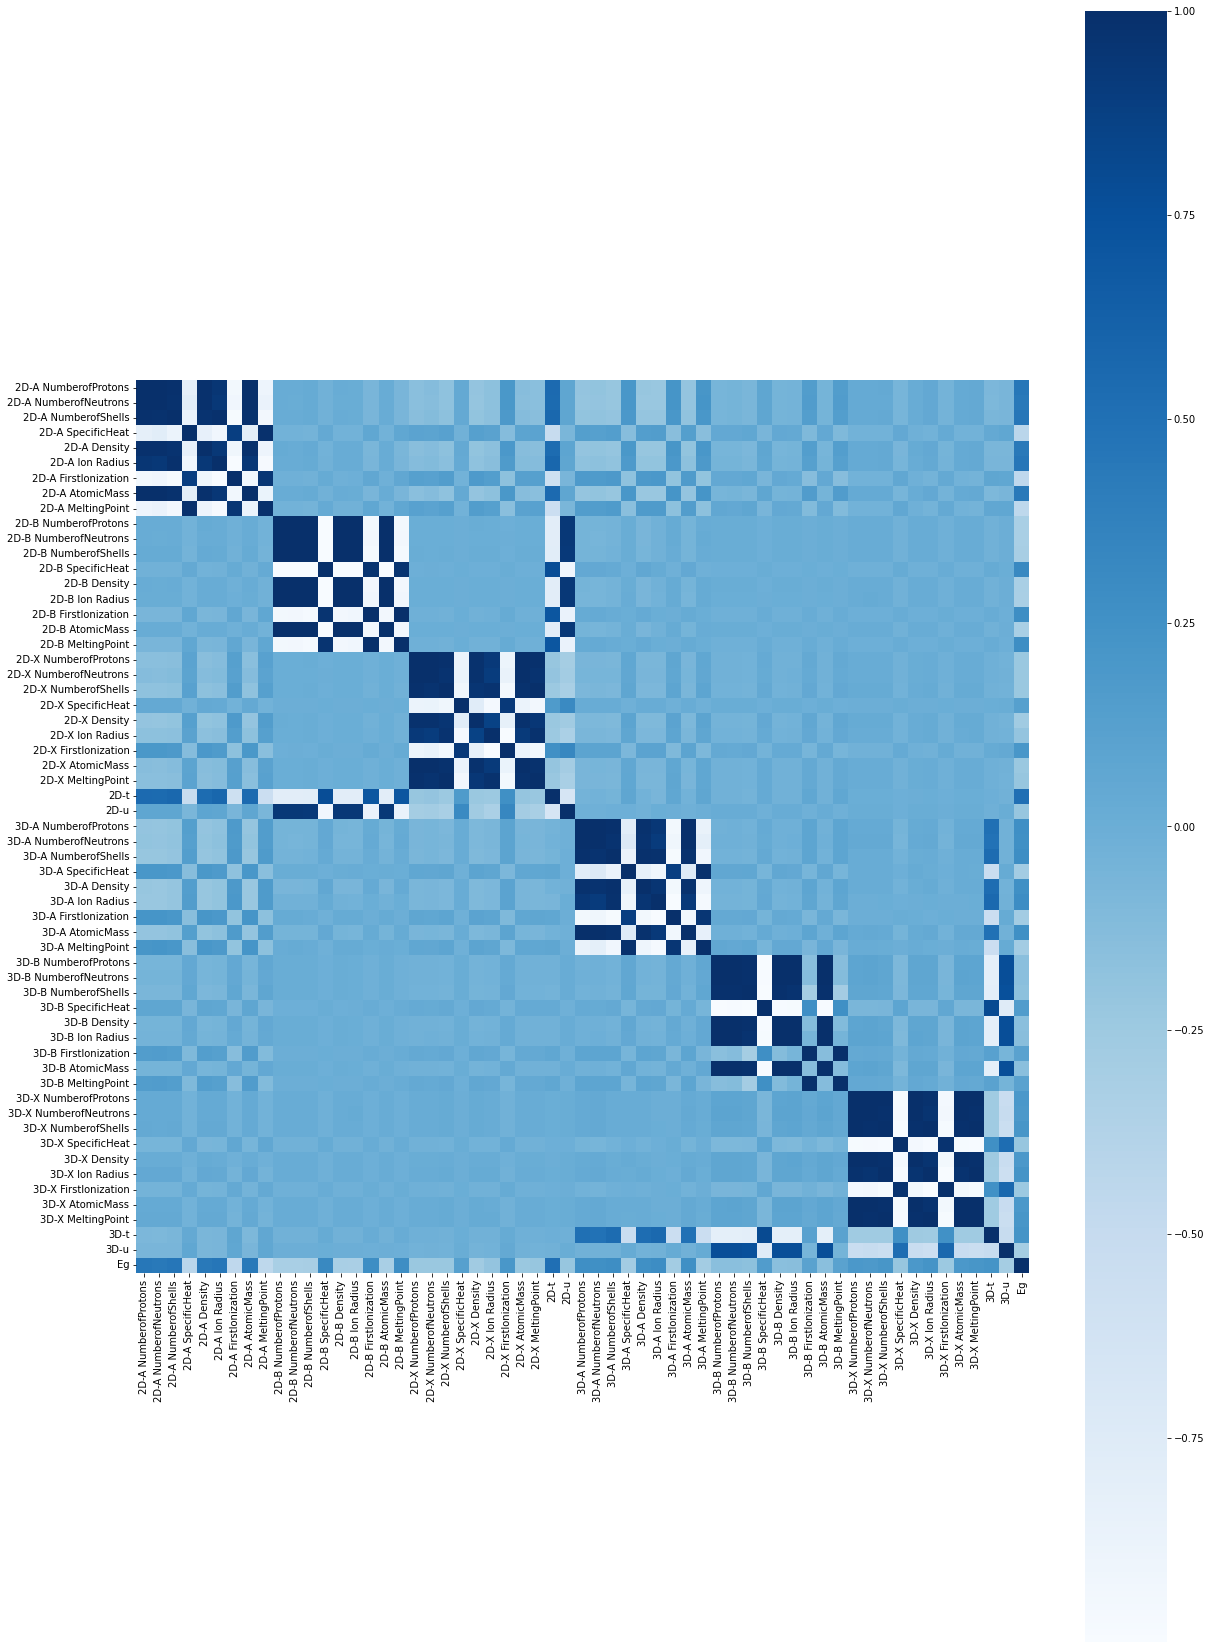

In [4]:
#将2d_pervsvskite.py输出文件加入容忍因子等，命名为Eg_final2.csv
dataset= r'Eg_final2.csv'
data=pd.DataFrame(pd.read_csv(dataset))
featureData=data.iloc[:,:]
corMat = DataFrame(featureData.corr())  #corr 求相关系数矩阵
print(corMat)
writer = pd.ExcelWriter('output.xlsx')
corMat.to_excel(writer,'Sheet1')
writer.save()
plt.figure(figsize=(20, 30))
sns.heatmap(corMat, annot=False, vmax=1, square=True, cmap="Blues",linewidths=0)
plot.show()

In [5]:
#将output.xlsx复制成Eg_heatMap.xlsx  删减描述符，目标>0.2,之间<0.8
#根据Eg_heatMap.xlsx删减Eg_final2特征,生成新的Eg_After.csv
dataset= r'Eg_After.csv'
data=pd.DataFrame(pd.read_csv(dataset))

                      2D-A NumberofProtons  2D-A SpecificHeat  \
2D-A NumberofProtons              1.000000          -0.813606   
2D-A SpecificHeat                -0.813606           1.000000   
2D-X NumberofProtons             -0.151115           0.099222   
2D-X FirstIonization              0.197110          -0.129423   
2D-t                              0.554317          -0.513921   
2D-u                              0.075813          -0.072939   
3D-A NumberofProtons             -0.202007           0.138420   
3D-A SpecificHeat                 0.203300          -0.134278   
3D-X NumberofShells               0.039362          -0.033379   
3D-t                             -0.084905           0.043973   
3D-u                             -0.069613           0.063806   
Eg                                0.448701          -0.426790   

                      2D-X NumberofProtons  2D-X FirstIonization      2D-t  \
2D-A NumberofProtons             -0.151115              0.197110  0.554317  

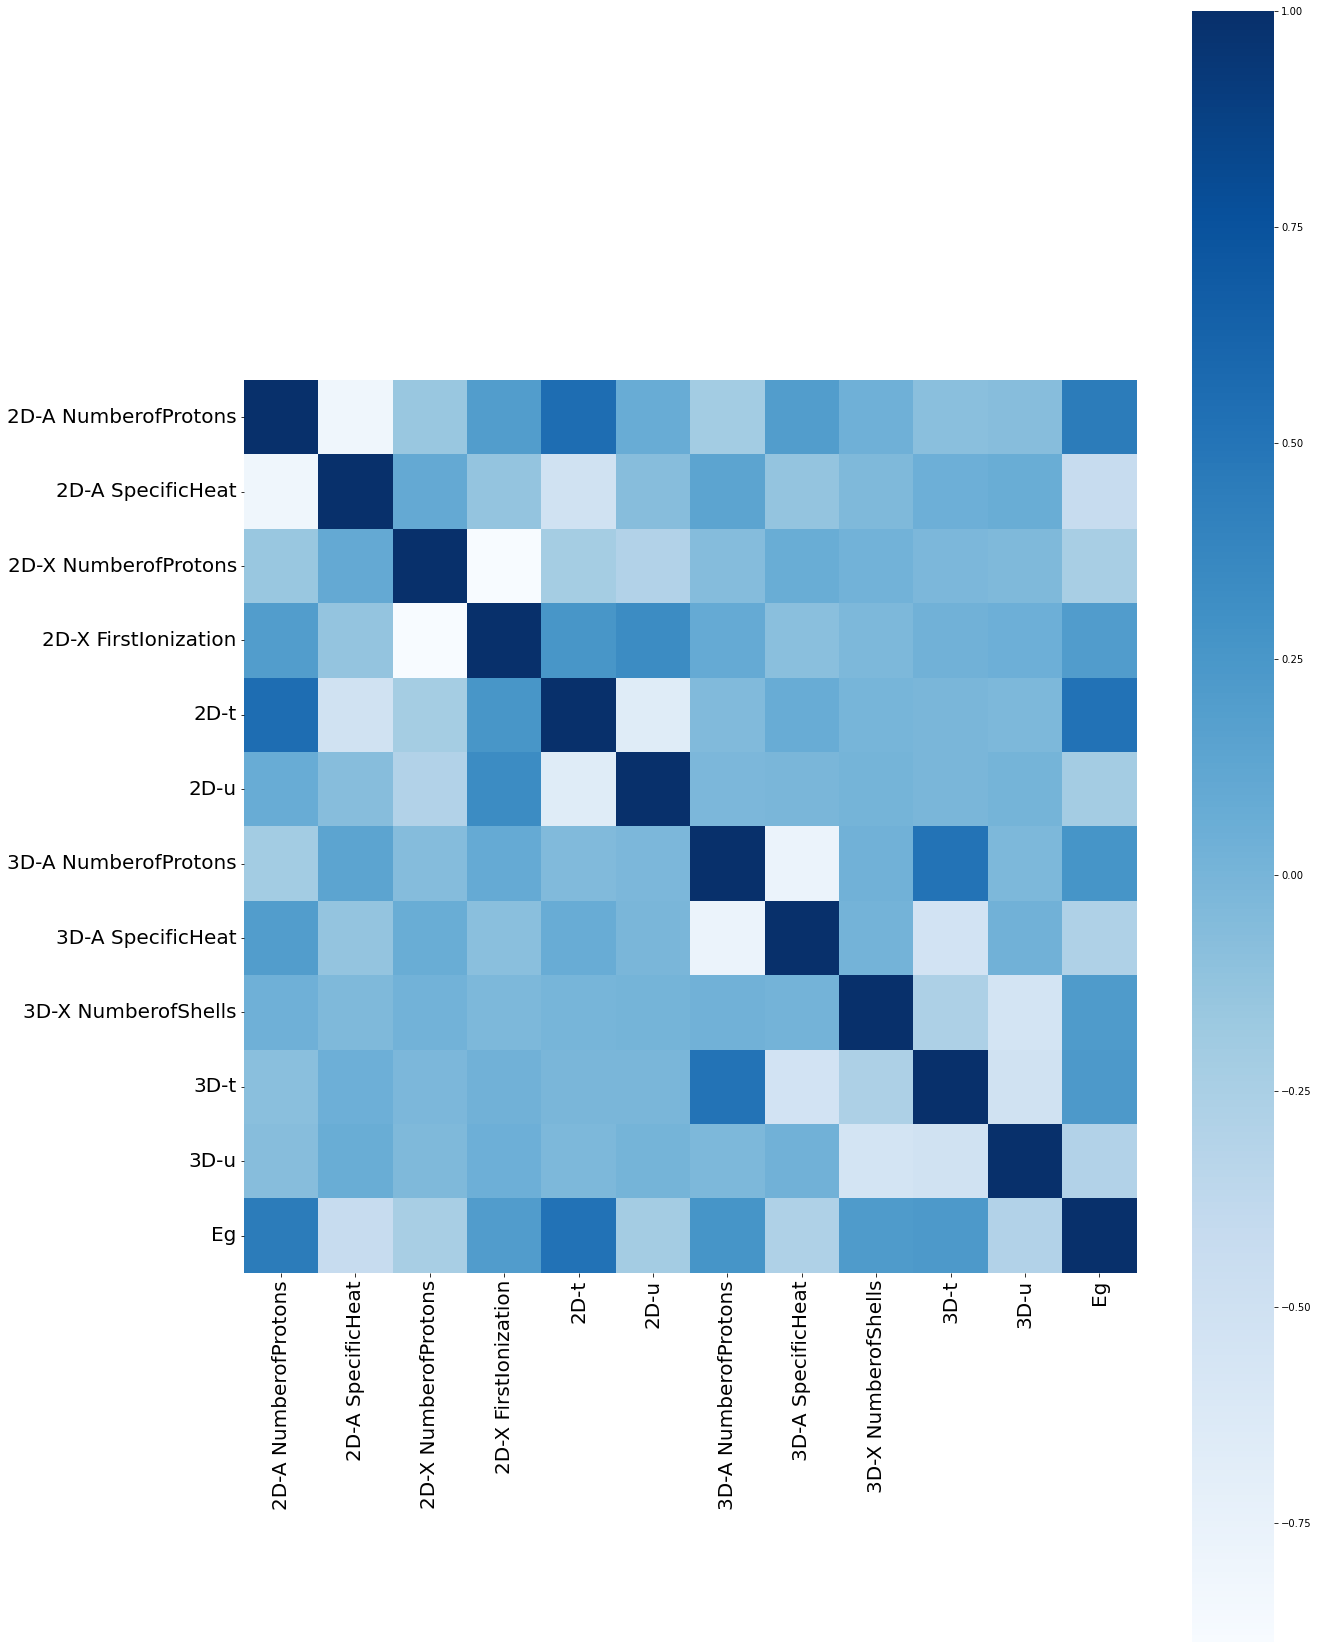

In [6]:
featureData=data.iloc[:,:]
corMat = DataFrame(featureData.corr())  #corr 求相关系数矩阵
print(corMat)
writer = pd.ExcelWriter('output1.xlsx')
corMat.to_excel(writer,'Sheet1')
writer.save()
plt.figure(figsize=(20, 30))
sns.heatmap(corMat, annot=False, vmax=1, square=True, cmap="Blues",linewidths=0) #annot_kws={"fontsize":20}
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plot.show()

In [7]:
#读取原数据集的特征和目标值
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])

for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [75]:
# 随机过采样
ros = RandomOverSampler(random_state=0, sampling_strategy='auto')
X_ros, y_ros = ros.fit_resample(X_train, y_train.astype('int'))
print('随机过采样后标签数据统计：', Counter(y_ros))

param_grid = {
    'n_estimators':[10,11,13,15,17,19],       # 决策树个数-随机森林特有参数
    'random_state':[0,10,42],
    'min_samples_split':[2,3],                     # 叶子的最小拆分样本
    'max_features':[0.1,0.2,0.3],  # 每棵决策树使用的变量占比-随机森林特有参数（结合原理）
    'max_depth':[8,9,10,20]                # 深度：这里是森林中每棵决策树的深度
}

# neg_mean_squared_error   ‘neg_mean_absolute_error’
rfr = ensemble.RandomForestRegressor()
rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid,
                      scoring='neg_mean_squared_error', cv=10)
rfr_cv.fit(X_ros, y_ros)
print(rfr_cv.best_params_, rfr_cv.best_score_) # 输出最优参数及最优模型得分

随机过采样后标签数据统计： Counter({3: 120, 2: 120, 1: 120})
{'max_depth': 20, 'max_features': 0.3, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 10} -0.047416666666666676


In [6]:
#计算准确率
clf = RandomForestRegressor(max_depth=20,max_features=0.3, min_samples_split=2, n_estimators=10,random_state=10)
clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

R2: 0.9901288086025918
RMSE: 0.2698692574146989
r: (0.8151743861682881, 8.668485780058979e-11)
MAE: 0.18580975609756104
R2b: 0.6567356329268303
MSE: 0.07282941609756102


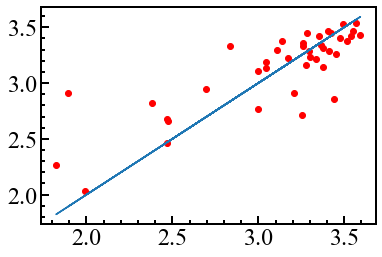

In [78]:
#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()
plt.show()

In [79]:
#使用KFold交叉验证

for nk in range(2,10):
 kfolder = KFold(n_splits=nk)
 score=0
 for train, test in kfolder.split(X_train, y_train):
   train_data = np.array(data)[train]
   test_data = np.array(data)[test]
   trany=train_data[:,11]
   tranx=train_data[:,:11]
   testx=test_data[:,:11]
   testy=test_data[:,11]
   clf.fit(tranx,trany)
   pu=pearsonr(testy,clf.predict(testx))
   score=score+pu[0]
 print(score/nk)

0.4129122395543931
0.5117260332855874
0.6548458867890553
0.6283070408350859
0.6238885078924007
0.6202600032623559
0.6999958136039016
0.6329843271784751


In [7]:
# 随机过采样xgboost
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

ros = RandomOverSampler(random_state=0, sampling_strategy='auto')
X_ros, y_ros = ros.fit_resample(X_train, y_train.astype('int'))
print('随机过采样后标签数据统计：', Counter(y_ros))

param_grid = {
    'n_estimators':[1000,2000,2500],       # 决策树个数-随机森林特有参数
    'eta':[0.1,0.2],
    'subsample':[0.7,0.8,0.9],                     # 叶子的最小拆分样本
    'colsample_bytree':[0.8,0.9,0.7],  # 每棵决策树使用的变量占比-随机森林特有参数（结合原理）
    'max_depth':[8,9,10,20,40]                # 深度：这里是森林中每棵决策树的深度
}

# neg_mean_squared_error   ‘neg_mean_absolute_error’
rfr = XGBRegressor()
rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid,
                      scoring='neg_mean_squared_error', cv=10)
rfr_cv.fit(X_ros, y_ros)
print(rfr_cv.best_params_, rfr_cv.best_score_) # 输出最优参数及最优模型得分

随机过采样后标签数据统计： Counter({3: 120, 2: 120, 1: 120})
{'colsample_bytree': 0.9, 'eta': 0.1, 'max_depth': 20, 'n_estimators': 2000, 'subsample': 0.9} -0.041502454174057624


R2: 0.9965117726064495
RMSE: 0.16042462095479784
r: (0.9378423958889652, 1.606582151340201e-19)
MAE: 0.12105046060608658
R2b: 0.8786991235152425
MSE: 0.02573605900849056


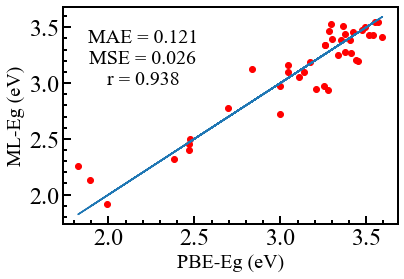

In [230]:
#计算准确率xgboost
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

clf = XGBRegressor(n_estimators=2000, max_depth=100, eta=0.1, gamma=0, subsample=0.9, colsample_bytree=0.9, learning_rate=0.2)
clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.2, 2.8, 'MAE = 0.121\nMSE = 0.026\nr = 0.938\n', fontproperties = 'Times New Roman', size = 20, horizontalalignment='center')
plt.savefig('xgboost-test.tif', dpi=300, bbox_inches = 'tight')
plt.show()

In [227]:
#使用KFold交叉验证

for nk in range(2,10):
 kfolder = KFold(n_splits=nk, shuffle=True, random_state=2021)
 score=0
 for train, test in kfolder.split(X_train, y_train):
   train_data = np.array(data)[train]
   test_data = np.array(data)[test]
   trany=train_data[:,11]
   tranx=train_data[:,:11]
   testx=test_data[:,:11]
   testy=test_data[:,11]
   clf.fit(tranx,trany)
   pu=pearsonr(testy,clf.predict(testx))
   score=score+pu[0]
 print(score/nk, nk)

0.801987074325141 2
0.8544004802316693 3
0.8068696735406692 4
0.8801511667091839 5
0.8651483240011499 6
0.8603534402050002 7
0.8373019294319812 8
0.8881996730551516 9


In [34]:
df = pd.DataFrame(data=[0.801987074325141,0.8544004802316693,0.8068696735406692,0.8801511667091839,0.8651483240011499,0.8603534402050002,0.8373019294319812,0.8881996730551516], 
                  index = [2,3,4,5,6,7,8,9],
                  columns=['score'])

In [35]:
df

,score
2,0.801987
3,0.854400
4,0.806870
5,0.880151
6,0.865148
7,0.860353
8,0.837302
9,0.888200


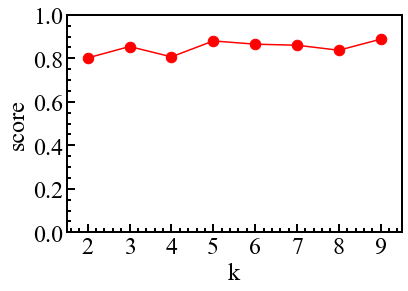

In [228]:
#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.scatter(df.index, df.score, s=111, c='r')
plt.plot(df.index, df.score, c='r')

ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)

x_major_locator=MultipleLocator(1) #把x轴的刻度间隔设置为1，并存在变量里
ax.xaxis.set_major_locator(x_major_locator) #把x轴的主刻度设置为1的倍数
y_major_locator=MultipleLocator(0.2) #把y轴的刻度间隔设置为10，并存在变量里
ax.yaxis.set_major_locator(y_major_locator) #把y轴的主刻度设置为10的倍数

plt.xlim(1.5,9.5)
plt.ylim(0,1)

plt.minorticks_on()

plt.xlabel("k", fontproperties = 'Times New Roman', size = 24)
plt.ylabel("score", fontproperties = 'Times New Roman', size = 24)

plt.savefig('10-fold-crossvalidation.tif', dpi=300, bbox_inches = 'tight')
plt.show()

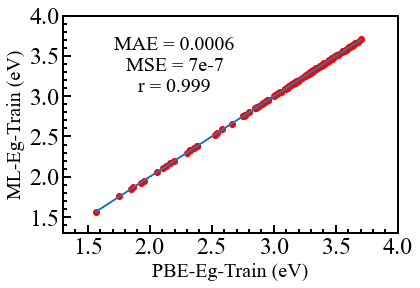

R2: 0.9965117726064495
RMSE: 0.16042462095479784
r: (0.9999980766148666, 0.0)
MAE: 0.0006446193754673119
R2b: 0.999996037114564
MSE: 7.687168258280701e-07


In [231]:
#补充计算train set准确率xgboost
# from xgboost import XGBRegressor
# from numpy import absolute
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold

# clf = XGBRegressor(n_estimators=2000, max_depth=100, eta=0.1, gamma=0, subsample=0.9, colsample_bytree=0.9, learning_rate=0.2)
# clf.fit(X_train, y_train)
# y_prediction=clf.predict(X_test)
# mse = mean_squared_error(y_test, y_prediction)
# rmse = mse ** (1/2)
# sse = np.sum((y_test - y_prediction) ** 2)
# sst = np.sum((y_test - np.mean(X_test)) ** 2)
# R2= 1 - sse / sst

# from sklearn.metrics import mean_absolute_error
# MAE = mean_absolute_error(y_test, y_prediction)
# print("R2:",R2)
# print("RMSE:",rmse)
# print("r:",pearsonr(y_test, y_prediction))
# print("MAE:",MAE)


# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
# R2b = r2_score(y_test, y_prediction)
# MSE = mean_squared_error(y_test, y_prediction)
# print("R2b:",R2b)
# print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_train, y_train, label='Real Data')
plt.scatter(y_train, clf.predict(X_train), label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)

x_major_locator=MultipleLocator(0.5) #把x轴的刻度间隔设置为1，并存在变量里
ax.xaxis.set_major_locator(x_major_locator) #把x轴的主刻度设置为1的倍数
y_major_locator=MultipleLocator(0.5) #把y轴的刻度间隔设置为10，并存在变量里
ax.yaxis.set_major_locator(y_major_locator) #把y轴的主刻度设置为10的倍数

plt.xlim(1.3,4)
plt.ylim(1.3,4)

plt.minorticks_on()

plt.xlabel("PBE-Eg-Train (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg-Train (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.2, 2.8, 'MAE = 0.0006\nMSE = 7e-7\nr = 0.999\n', fontproperties = 'Times New Roman', size = 20, horizontalalignment='center')
plt.savefig('xgboost-train.tif', dpi=300, bbox_inches = 'tight')
plt.show()

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_train, clf.predict(X_train))
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_train, clf.predict(X_train)))
print("MAE:",MAE)
x_values=list(range(11))
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_train, clf.predict(X_train))
MSE = mean_squared_error(y_train, clf.predict(X_train))
print("R2b:",R2b)
print("MSE:",MSE)

R2: 0.9936661779687191
RMSE: 0.21617305285462343
r: (0.892623256249468, 4.526824638642603e-15)
MAE: 0.16940487804878054
R2b: 0.7797453900759569
MSE: 0.046730788780487816


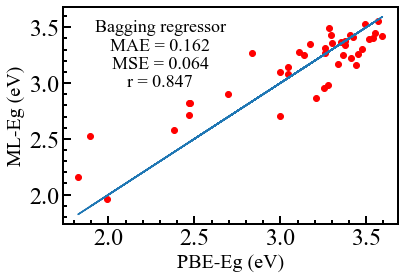

In [232]:
#计算准确率bagging

from sklearn import ensemble

clf = ensemble.BaggingRegressor()
clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.3, 2.8, 'Bagging regressor\nMAE = 0.162\nMSE = 0.064\nr = 0.847\n', fontproperties = 'Times New Roman', size = 18, horizontalalignment='center')
plt.savefig('Bagging.tif', dpi=300, bbox_inches = 'tight')
plt.show()


R2: 0.9928534028179363
RMSE: 0.22962452955459856
r: (0.8679173993899535, 2.0403446199934511e-13)
MAE: 0.1531817073170731
R2b: 0.7514816540714533
MSE: 0.0527274245731707


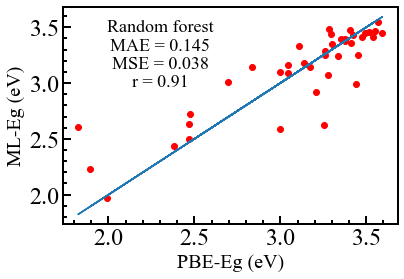

In [233]:
#计算准确率RF

from sklearn import ensemble

clf = ensemble.RandomForestRegressor(n_estimators=20) 

clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()
plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.3, 2.8, 'Random forest\nMAE = 0.145\nMSE = 0.038\nr = 0.91\n', fontproperties = 'Times New Roman', size = 18, horizontalalignment='center')
plt.savefig('RF.tif', dpi=300, bbox_inches = 'tight')
plt.show()


R2: 0.987508593376843
RMSE: 0.30358079964219997
r: (0.7786715089418086, 2.0451627529332925e-09)
MAE: 0.22265153283825823
R2b: 0.5656193243829312
MSE: 0.09216130191139757


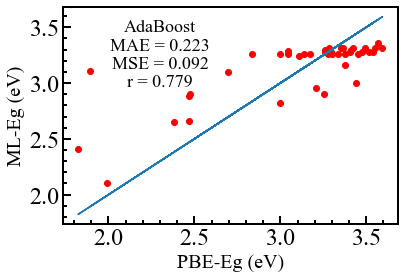

In [234]:
#计算准确率adaboost

from sklearn import ensemble

clf = ensemble.AdaBoostRegressor(n_estimators=50)


clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)

print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.3, 2.8, f'AdaBoost\nMAE = {round(MAE,3)}\nMSE = {round(MSE,3)}\nr = {round(pearsonr(y_test, y_prediction)[0],3)}\n', fontproperties = 'Times New Roman', size = 18, horizontalalignment='center')
plt.savefig('adaBoost.tif', dpi=300, bbox_inches = 'tight')
plt.show()

R2: 0.9916264114908513
RMSE: 0.2485561053245508
r: (0.8427976994468409, 4.80220633674364e-12)
MAE: 0.1605326223300105
R2b: 0.7088138154753243
MSE: 0.06178013749410919


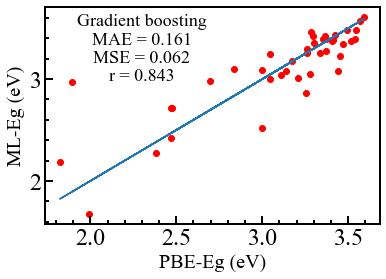

In [235]:
#计算准确率gbrt

from sklearn import ensemble

clf = ensemble.GradientBoostingRegressor(n_estimators=100)


clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)



plt.text(2.3, 2.8, f'Gradient boosting\nMAE = {round(MAE,3)}\nMSE = {round(MSE,3)}\nr = {round(pearsonr(y_test, y_prediction)[0],3)}\n', fontproperties = 'Times New Roman', size = 18, horizontalalignment='center')
plt.savefig('GBRT.tif', dpi=300, bbox_inches = 'tight')
plt.show()

R2: 0.9797256884087497
RMSE: 0.38676011976922137
r: (0.5917355788673063, 4.6073046392278715e-05)
MAE: 0.252609756097561
R2b: 0.29497378218783155
MSE: 0.14958339024390244


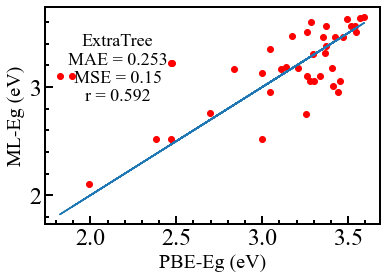

In [236]:
from sklearn.tree import ExtraTreeRegressor
clf = ExtraTreeRegressor()


clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xmajorLocator   = MultipleLocator(100)
xmajorLocator   = MultipleLocator(500)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.16, 2.7, f'ExtraTree\nMAE = {round(MAE,3)}\nMSE = {round(MSE,3)}\nr = {round(pearsonr(y_test, y_prediction)[0],3)}\n', fontproperties = 'Times New Roman', size = 18, horizontalalignment='center')
plt.savefig('ExtraTree.tif', dpi=300, bbox_inches = 'tight')
plt.show()

R2: 0.9858065043840051
RMSE: 0.3236035756080909
r: (0.7239333174228628, 8.844789841804021e-08)
MAE: 0.23295609756097552
R2b: 0.5064302683403028
MSE: 0.10471927414634141


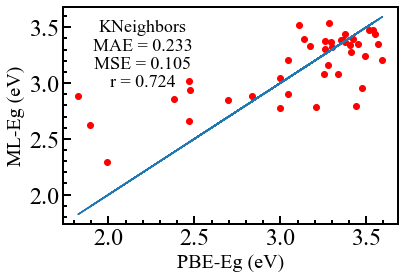

In [237]:
from sklearn import neighbors
clf = neighbors.KNeighborsRegressor()


clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.2, 2.8, f'KNeighbors\nMAE = {round(MAE,3)}\nMSE = {round(MSE,3)}\nr = {round(pearsonr(y_test, y_prediction)[0],3)}\n', fontproperties = 'Times New Roman', size = 18, horizontalalignment='center')
plt.savefig('KNeighbors.tif', dpi=300, bbox_inches = 'tight')
plt.show()

R2: 0.9902633075138899
RMSE: 0.2680244136618713
r: (0.8252773276044759, 3.1909132670129555e-11)
MAE: 0.16799874665850145
R2b: 0.6614127465395693
MSE: 0.07183708631878989


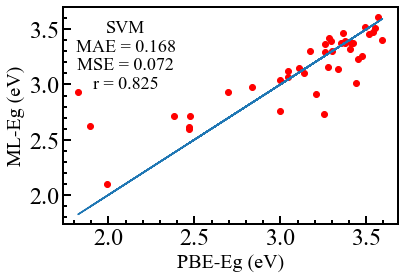

In [238]:
from sklearn import svm
clf = svm.SVR()


clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.1, 2.8, f'SVM\nMAE = {round(MAE,3)}\nMSE = {round(MSE,3)}\nr = {round(pearsonr(y_test, y_prediction)[0],3)}\n', fontproperties = 'Times New Roman', size = 18, horizontalalignment='center')
plt.savefig('SVM.tif', dpi=300, bbox_inches = 'tight')
plt.show()

R2: 0.9879627776023883
RMSE: 0.2980106398493427
r: (0.7975552793998171, 4.317888521477221e-10)
MAE: 0.19839024390243903
R2b: 0.5814132903227818
MSE: 0.08881034146341461


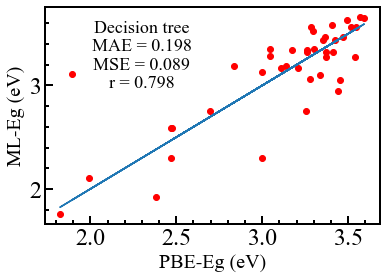

In [239]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()



clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.3, 2.8, f'Decision tree\nMAE = {round(MAE,3)}\nMSE = {round(MSE,3)}\nr = {round(pearsonr(y_test, y_prediction)[0],3)}\n', fontproperties = 'Times New Roman', size = 18, horizontalalignment='center')
plt.savefig('Decision tree.tif', dpi=300, bbox_inches = 'tight')
plt.show()

R2: 0.9866043003155701
RMSE: 0.31437740802721587
r: (0.7349370187656763, 4.467872038905959e-08)
MAE: 0.22419465429934643
R2b: 0.5341731115774551
MSE: 0.09883315467791058


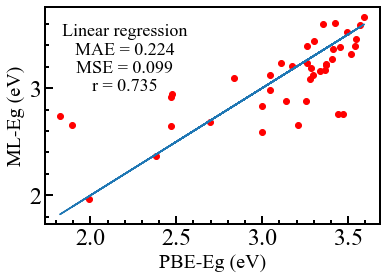

In [240]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.2, 2.8, f'Linear regression\nMAE = {round(MAE,3)}\nMSE = {round(MSE,3)}\nr = {round(pearsonr(y_test, y_prediction)[0],3)}\n', fontproperties = 'Times New Roman', size = 18, horizontalalignment='center')
plt.savefig('LinearRegression.tif', dpi=300, bbox_inches = 'tight')
plt.show()

R2: 0.9859215160840354
RMSE: 0.3222898083251907
r: (0.7144907961721323, 1.5495581823812516e-07)
MAE: 0.22799764178192267
R2b: 0.5104297266455389
MSE: 0.10387072055028818


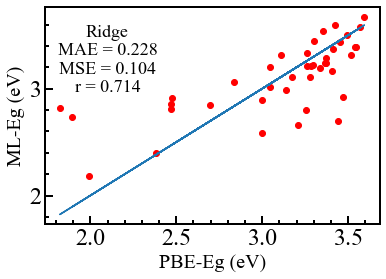

In [241]:
from sklearn.linear_model import Ridge
clf = Ridge()

clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.1, 2.8, f'Ridge\nMAE = {round(MAE,3)}\nMSE = {round(MSE,3)}\nr = {round(pearsonr(y_test, y_prediction)[0],3)}\n', fontproperties = 'Times New Roman', size = 18, horizontalalignment='center')
plt.savefig('Ridge.tif', dpi=300, bbox_inches = 'tight')
plt.show()

R2: 0.9711560155750687
RMSE: 0.4613135953291625
r: (nan, nan)
MAE: 0.3454368902439024
R2b: -0.0030311093037882486
MSE: 0.2128102332355183


D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


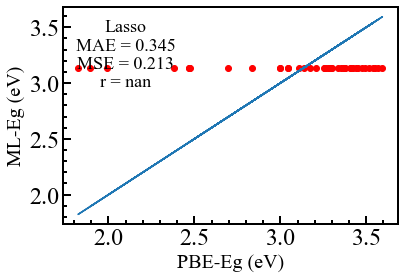

In [214]:
from sklearn.linear_model import Lasso
clf = Lasso()

clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.1, 2.8, f'Lasso\nMAE = {round(MAE,3)}\nMSE = {round(MSE,3)}\nr = {round(pearsonr(y_test, y_prediction)[0],3)}\n', fontproperties = 'Times New Roman', size = 18, horizontalalignment='center')
plt.savefig('Lasso.tif', dpi=300, bbox_inches = 'tight')
plt.show()

R2: 0.9914246949842693
RMSE: 0.2515320995365135
r: (0.8482513124856547, 2.540013131735103e-12)
MAE: 0.18035347573712954
R2b: 0.7017992529800385
MSE: 0.06326839709724655


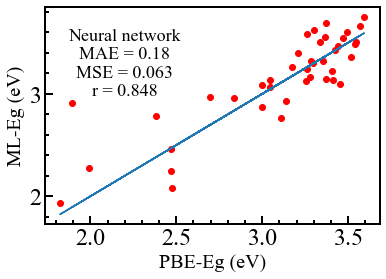

In [216]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', activation='relu', learning_rate_init=0.01,alpha=0.0001,max_iter=200000, hidden_layer_sizes=(200,200))

clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.2, 2.8, f'Neural network\nMAE = {round(MAE,3)}\nMSE = {round(MSE,3)}\nr = {round(pearsonr(y_test, y_prediction)[0],3)}\n', fontproperties = 'Times New Roman', size = 18, horizontalalignment='center')
plt.savefig('NN.tif', dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
#使用KFold交叉验证

for nk in range(2,10):
 kfolder = KFold(n_splits=nk, shuffle=True, random_state=2021)
 score=0
 for train, test in kfolder.split(X_train, y_train):
   train_data = np.array(data)[train]
   test_data = np.array(data)[test]
   trany=train_data[:,11]
   tranx=train_data[:,:11]
   testx=test_data[:,:11]
   testy=test_data[:,11]
   clf.fit(tranx,trany)
   pu=pearsonr(testy,clf.predict(testx))
   score=score+pu[0]
 print(score/nk, nk)

0.4752031832433245 2
0.7408355895099875 3
0.6980390501085866 4
0.7059795141559844 5
0.7107027894465641 6
0.7379200083618253 7


R2: 0.9853800216483694
RMSE: 0.3284293739276932
r: (0.7321263603244711, 5.3360985913914294e-08)
MAE: 0.21521951219512195
R2b: 0.49159960399374025
MSE: 0.10786585365853656


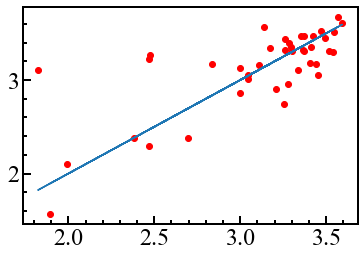

In [165]:
from sklearn.tree import ExtraTreeRegressor
clf = ExtraTreeRegressor()

clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()
plt.show()

In [42]:
#使用KFold交叉验证

for nk in range(2,10):
 kfolder = KFold(n_splits=nk)
 score=0
 for train, test in kfolder.split(X_train, y_train):
   train_data = np.array(data)[train]
   test_data = np.array(data)[test]
   trany=train_data[:,11]
   tranx=train_data[:,:11]
   testx=test_data[:,:11]
   testy=test_data[:,11]
   clf.fit(tranx,trany)
   pu=pearsonr(testy,clf.predict(testx))
   score=score+pu[0]
 print(score/nk, nk)

0.5808763754069175 2
0.5877360467491464 3


D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.5996271916308105 4


D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.517286738203939 5


D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.4718236015235117 6


D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.43056632354209484 7


D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (sta

0.43258048703080976 8


D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (sta

0.4893110864613084 9


D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


R2: 0.99360375162844
RMSE: 0.21723574484652453
r: (0.8936834944163875, 3.767173668612392e-15)
MAE: 0.1573863414634145
R2b: 0.7775745540216316
MSE: 0.047191368839024306


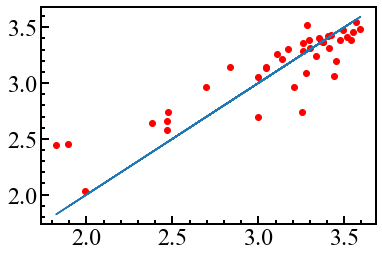

In [166]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()
plt.show()

随机过采样后标签数据统计： Counter({3: 120, 2: 120, 1: 120})
best_score_: {'subsample': 0.6, 'reg_lambda': 0.01, 'reg_alpha': 0.001, 'random_state': 0, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 50, 'learning_rate': 0.03, 'gamma': 0.1, 'colsample_bytree': 0.6} 0.5115225561729
R2: 0.9907406070391462
RMSE: 0.2613724961383098
r: (0.8727092220488016, 1.0380282407572486e-13)
MAE: 0.19765407683209676
R2b: 0.6780105322419584
MSE: 0.06831558173757078


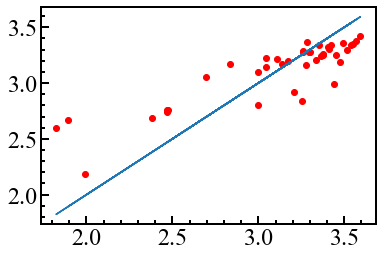

In [7]:
#计算准确率xgboost
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error


#读取原数据集的特征和目标值
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])

for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])
    
    
    
# 随机过采样
ros = RandomOverSampler(random_state=0, sampling_strategy='auto')
X_ros, y_ros = ros.fit_resample(X_train, y_train.astype('int'))
print('随机过采样后标签数据统计：', Counter(y_ros))

param_grid = {
            'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 20, 30, 50, 100, 200],
            'n_estimators': [5, 10, 30, 50, 100, 300, 500, 1000,2000, 3000],
            'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.01, 0.02, 0.03, 0.04, 0.05, 0.5,0.6],
            "gamma":[0.0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6],
            "reg_alpha":[0.0001,0.001, 0.01, 0.1, 1, 10, 100, 200],
            "reg_lambda":[0.0001,0.001, 0.01, 0.1, 1, 10, 100,200],
            "min_child_weight": [1,2,3,4,5,6,7,8,9],
            "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9],
            "subsample":[0.5, 0.6, 0.7, 0.8, 0.9],
            "random_state":[0,1]}


#3.随机搜索并打印最佳参数
gsearch1 = RandomizedSearchCV(XGBRegressor(seed=27), param_grid, cv=5)
gsearch1.fit(X_train, y_train)
print("best_score_:",gsearch1.best_params_,gsearch1.best_score_)
 
#4.用最佳参数进行预测
y_test_pre= gsearch1.predict(X_test)
 
 
#.打印测试集RMSE
rmse = sqrt(mean_squared_error(np.array(list(y_test)), np.array(list(y_test_pre))))

gsearch1.fit(X_train, y_train)
y_prediction=gsearch1.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()
plt.show()

In [ ]:
#使用KFold交叉验证

for nk in range(2,10):
 kfolder = KFold(n_splits=nk)
 score=0
 for train, test in kfolder.split(X_train, y_train):
   train_data = np.array(data)[train]
   test_data = np.array(data)[test]
   trany=train_data[:,11]
   tranx=train_data[:,:11]
   testx=test_data[:,:11]
   testy=test_data[:,11]
   gsearch1.fit(tranx,trany)
   pu=pearsonr(testy,gsearch1.predict(testx))
   score=score+pu[0]
 print(score/nk, nk)

0.3010331805825609 2
0.6357752837552915 3
0.595933620413454 4
0.5578202133209088 5
0.598894888643732 6
